# Hyperparameter optimization with GridSearchCV
The grid search was run from command line, and the scripts used are available in the [GridSearchCV](https://github.com/caiocrocha/COVID-19/tree/master/SARS-CoV-2/postera.ai/GridSearchCV) folder.

## Table of contents
1. [KNN](#knn)    
2. [Decision Tree](#dt)    
3. [Random Forest](#rf)    
4. [XGBoost](#xgb)    

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = '../GridSearchCV'

<a id='knn'></a>
## KNN

* n_neighbors = 23

In [3]:
grid_knn = pd.read_csv(f'{directory}/KNeighborsClassifier/grid_search.csv')
grid_knn.sort_values('mean_test_score', ascending=False).head()

,clf,mean_test_score,std_test_score,clf__n_neighbors
7,KNeighborsClassifier,0.627930,0.049699,19
5,KNeighborsClassifier,0.627097,0.052359,15
6,KNeighborsClassifier,0.625888,0.050018,17
4,KNeighborsClassifier,0.625832,0.045946,13
9,KNeighborsClassifier,0.625659,0.045987,23


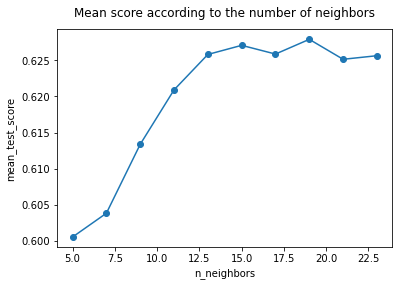

In [4]:
x = grid_knn['clf__n_neighbors']
y = grid_knn['mean_test_score']
plt.plot(x, y, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.savefig('figures/grid_search_knn.png', dpi=200)
plt.title('Mean score according to the number of neighbors', y=1.03)
plt.show()

We see here that K = 23, or sqrt(Number of molecules), is a good choice for our model.

<a id='rf'></a>
## Random Forest

* max_depth = 6
* n_estimators = 500

In [5]:
grid_rf = pd.read_csv(f'{directory}/RandomForestClassifier/grid_search.csv')
grid_rf.sort_values('mean_test_score', ascending=False).head()

,clf,mean_test_score,std_test_score,clf__max_depth,clf__n_estimators
19,RandomForestClassifier,0.605747,0.069073,6.0,1000
14,RandomForestClassifier,0.605440,0.069838,5.0,1000
18,RandomForestClassifier,0.604851,0.069123,6.0,500
13,RandomForestClassifier,0.603855,0.070621,5.0,500
12,RandomForestClassifier,0.603365,0.066440,5.0,200


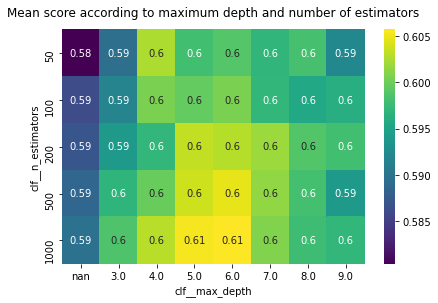

In [6]:
table = grid_rf.pivot('clf__n_estimators', 'clf__max_depth', 'mean_test_score')
sns.heatmap(table, cmap='viridis', annot=True)
plt.tight_layout()
plt.savefig('figures/grid_search_rf.png', dpi=200)
plt.title('Mean score according to maximum depth and number of estimators', y=1.03)
plt.show()

<a id='xgb'></a>
## XGBoost

* max_depth = 5
* n_estimators = 200
* eta = 0.01 (learning rate)

In [7]:
grid_xgb = pd.read_csv(f'{directory}/XGBClassifier/grid_search.csv')
grid_xgb.sort_values('mean_test_score', ascending=False).head()

,clf,mean_test_score,std_test_score,clf__eta,clf__max_depth,clf__n_estimators
80,XGBClassifier,0.612507,0.062898,0.100,3.0,50
43,XGBClassifier,0.609608,0.064178,0.010,3.0,500
52,XGBClassifier,0.603835,0.063854,0.010,5.0,200
18,XGBClassifier,0.600027,0.060594,0.001,6.0,500
38,XGBClassifier,0.600027,0.060594,0.001,NaN,500


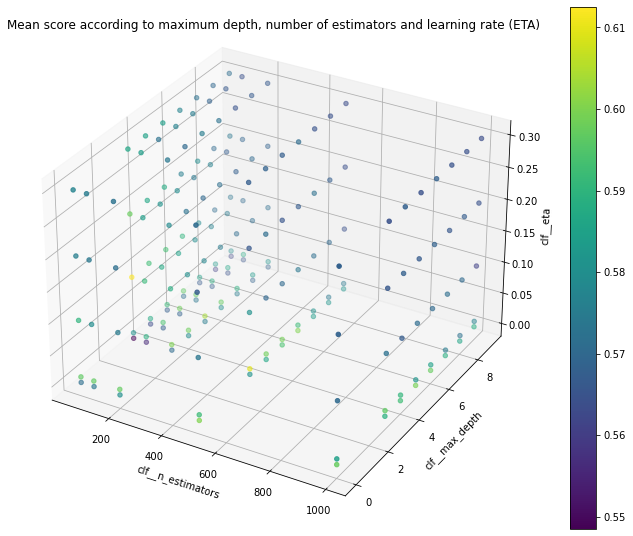

In [10]:
grid_xgb = grid_xgb.fillna(value=0)

x = grid_xgb['clf__n_estimators']
y = grid_xgb['clf__max_depth']
z = grid_xgb['clf__eta']
c = grid_xgb['mean_test_score']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12.8, 9.6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x, y, z, c=c, cmap='viridis')
fig.colorbar(p)

ax.set_xlabel('clf__n_estimators')
ax.set_ylabel('clf__max_depth')
ax.set_zlabel('clf__eta')
plt.savefig('figures/grid_search_xgb.png', dpi=200)
plt.title('Mean score according to maximum depth, number of estimators and learning rate (ETA)', y=1.03)
plt.show()